In [51]:
import os
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from plotnine import *

In [26]:
df = pd.read_csv(os.path.join('.data', 'train.csv'))
print(df.shape)
df.head()

(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
df['PassengerId'] = df['PassengerId'].astype('object')
df['Sex'] = df['Sex'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['SibSp'] = df['SibSp'].astype('category')
df['Parch'] = df['Parch'].astype('category')

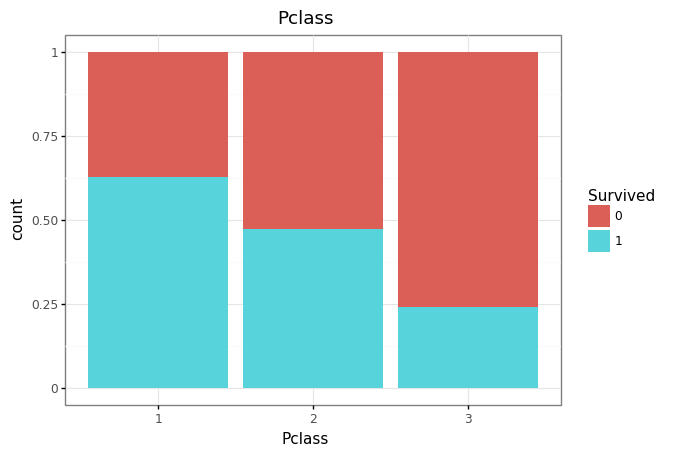

<ggplot: (8751241031777)>
3    491
1    216
2    184
Name: Pclass, dtype: int64
nan-sum: 0
-----------------------------------------------------


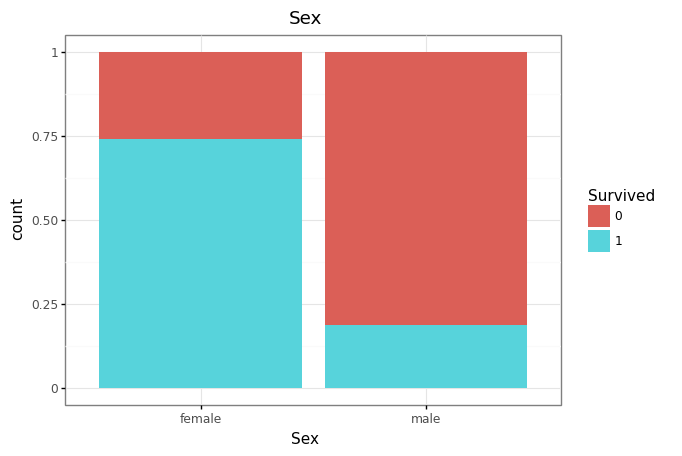

<ggplot: (8751241034638)>
male      577
female    314
Name: Sex, dtype: int64
nan-sum: 0
-----------------------------------------------------


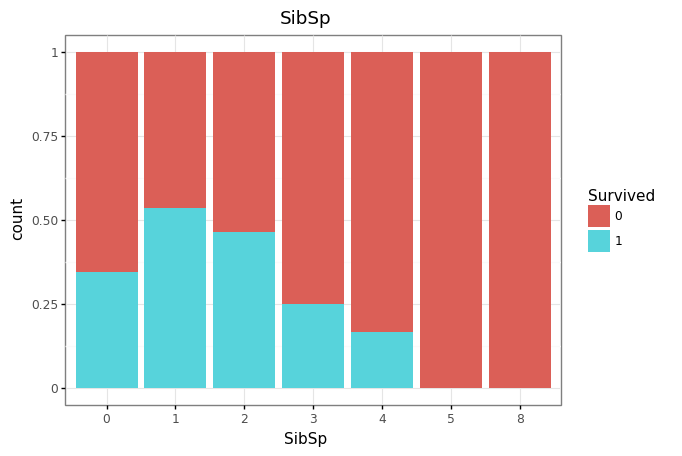

<ggplot: (8751241044453)>
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
nan-sum: 0
-----------------------------------------------------


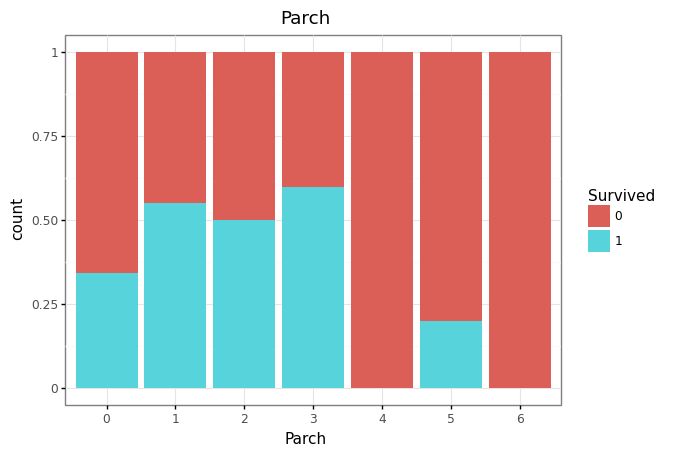

<ggplot: (8751241060145)>
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
nan-sum: 0
-----------------------------------------------------


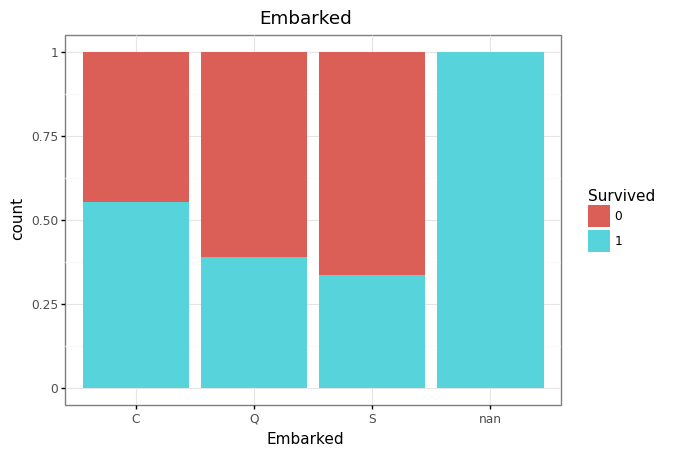

<ggplot: (8751240992732)>
S    644
C    168
Q     77
Name: Embarked, dtype: int64
nan-sum: 2
-----------------------------------------------------


In [29]:
for col in df.columns:
    if (df[col].dtype!='float64' and col not in ['PassengerId', 'Name', 'Survived', 'Ticket', 'Cabin']):
        print(
            ggplot(df) +\
            aes(x = col, fill = 'Survived') +\
            geom_bar(position = 'fill') +\
            labs(title = col) +\
            theme_bw()
        )
        
        print(df[col].value_counts())
        print("nan-sum:", df[col].isnull().sum())
        print("-----------------------------------------------------")

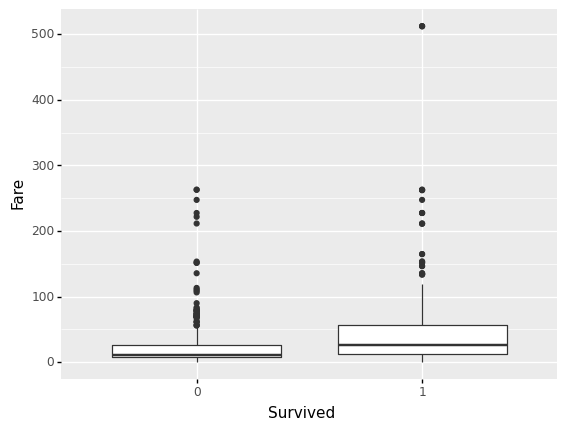

<ggplot: (8751240917185)>

In [30]:
# boxplot of Fare
ggplot(df, aes(x = "Survived", y = "Fare")) +\
    geom_boxplot()

In [31]:
# Ticket
ticket_counts = pd.DataFrame(df['Ticket'].value_counts()).reset_index()
ticket_counts.columns = ['Ticket', 'ticket_count']

df = pd.merge(df, ticket_counts, on='Ticket')
df.head()

PassengerId Survived Pclass  \
0           1        0      3   
1           2        1      1   
2           3        1      3   
3           4        1      1   
4         138        0      1   

                                                Name     Sex   Age SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0     1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     1   
2                             Heikkinen, Miss. Laina  female  26.0     0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     1   
4                        Futrelle, Mr. Jacques Heath    male  37.0     1   

  Parch            Ticket     Fare Cabin Embarked  ticket_count  
0     0         A/5 21171   7.2500   NaN        S             1  
1     0          PC 17599  71.2833   C85        C             1  
2     0  STON/O2. 3101282   7.9250   NaN        S             1  
3     0            113803  53.1000  C123        S             2  
4     0            113803  53.1000  C123        S             2

In [32]:
# Cabin
cabin_counts = pd.DataFrame(df['Cabin'].value_counts()).reset_index()
cabin_counts.columns = ['Cabin', 'cabin_count']

df = pd.merge(df, cabin_counts, on='Cabin')
df.head()

PassengerId Survived Pclass  \
0           2        1      1   
1           4        1      1   
2         138        0      1   
3           7        0      1   
4          11        1      3   

                                                Name     Sex   Age SibSp  \
0  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0     1   
1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0     1   
2                        Futrelle, Mr. Jacques Heath    male  37.0     1   
3                            McCarthy, Mr. Timothy J    male  54.0     0   
4                    Sandstrom, Miss. Marguerite Rut  female   4.0     1   

  Parch    Ticket     Fare Cabin Embarked  ticket_count  cabin_count  
0     0  PC 17599  71.2833   C85        C             1            1  
1     0    113803  53.1000  C123        S             2            2  
2     0    113803  53.1000  C123        S             2            2  
3     0     17463  51.8625   E46        S             1            1  
4     1   PP 9549  16.7000    G6        S             2            4

In [33]:
# Name
df['Name'].str.rfind("Dr") > 0

0      False
1      False
2      False
3      False
4      False
       ...  
199    False
200    False
201    False
202    False
203    False
Name: Name, Length: 204, dtype: bool

In [34]:
df[df["Cabin"] == 'G6']

PassengerId Survived Pclass  \
4          11        1      3   
5         395        1      3   
6         206        0      3   
7         252        0      3   

                                                Name     Sex   Age SibSp  \
4                    Sandstrom, Miss. Marguerite Rut  female   4.0     1   
5  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0     0   
6                         Strom, Miss. Telma Matilda  female   2.0     0   
7         Strom, Mrs. Wilhelm (Elna Matilda Persson)  female  29.0     1   

  Parch   Ticket     Fare Cabin Embarked  ticket_count  cabin_count  
4     1  PP 9549  16.7000    G6        S             2            4  
5     2  PP 9549  16.7000    G6        S             2            4  
6     1   347054  10.4625    G6        S             2            4  
7     1   347054  10.4625    G6        S             2            4

In [89]:
df_m = df[~df['Embarked'].isnull()].copy()
label_encoder = LabelEncoder()

df_m['Sex'] = sex_le = label_encoder.fit_transform(df_m['Sex'])
df_m['Embarked'] = embarked_le = label_encoder.fit_transform(df_m['Embarked'])

In [91]:
log_reg = LogisticRegression().fit(
    df_m[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    , df_m['Survived']
)
#  Age contains NaN...How do I process Nan through regression model?

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').